In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#import and reading the iris dataset
iris_df = pd.read_csv("https://datahub.io/machine-learning/iris/r/iris.csv")
iris_df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# feature selection
data = iris_df.drop('class', axis = 1)
data

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# Normalizing features using min-max scaler
for feature in data.columns:
    data[feature] = (data[feature] - data[feature].min()) / (data[feature].max() - data[feature].min()) * 9             # scaling it between the range [0,9]
    
data

,sepallength,sepalwidth,petallength,petalwidth
0,2.00,5.625,0.610169,0.375
1,1.50,3.750,0.610169,0.375
2,1.00,4.500,0.457627,0.375
3,0.75,4.125,0.762712,0.375
4,1.75,6.000,0.610169,0.375
...,...,...,...,...
145,6.00,3.750,6.406780,8.250
146,5.00,1.875,6.101695,6.750
147,5.50,3.750,6.406780,7.125
148,4.75,5.250,6.711864,8.250


In [32]:
# helper functions
def euclidean_distance(x, y):
    distance = 0
    for i in range(len(x)):
        distance += (x[i] - y[i])**2
    return distance**0.5

def choose_random_centroids(data, k):
    centroids = [[0 for _ in range(len(data.columns))] for _ in range(k)]
    for row in range(k):
        for col in range(len(data.columns)):
            centroids[row][col] = np.random.uniform(low = data[data.columns.values[col]].min(),
                                                    high = data[data.columns.values[col]].max(),
                                                    size = 1)[0]
    return centroids

def update_centroids(data, old_assigned_centroids, k):
    new_centroids = [[0 for _ in range(len(data.columns))] for _ in range(k)]
    # data points in each cluster
    total_cluster_points = [0 for _ in range(k)]
    for row in range(len(old_assigned_centroids)):
        total_cluster_points[old_assigned_centroids[row]] += 1
        for col in range(len(data.columns)):
            new_centroids[old_assigned_centroids[row]][col] += data.iloc[row][col]
    
    for i in range(k):
        for j in range(len(data.columns)):
            if(total_cluster_points[i] == 0):
                continue
            new_centroids[i][j] /= total_cluster_points[i]
    
    return new_centroids

def is_equal(lst1_2D, lst2_2D):
    for i in range(len(lst1_2D)):
        for j in range(len(lst1_2D[0])):
            if lst1_2D[i][j] != lst2_2D[i][j]:
                return False
    return True

def mini_distance_index(lst):
    mini_index = 0
    for i in range(len(lst)):
        if(lst[i] < lst[mini_index]):
            mini_index = i
    return mini_index

def kmeans(data, k = 3, max_iters = 200):
    # step 1: choosing ramdom centroids
    curr_centroids = choose_random_centroids(data, k)
    temp_data = data.copy()
    for _ in range(max_iters):
        old_assigned_centroids = []
        # step 2: find distances of data points from the centroids
        for row in range(len(data)):
            distances = []
            for c in range(k):
                distances.append(euclidean_distance(data.iloc[row], curr_centroids[c]))
            old_assigned_centroids.append(mini_distance_index(distances))
        
        temp_data['labels'] = np.array(old_assigned_centroids, dtype = int)
        # step 3: updating centroids based on the mean of each clusters
        new_centroids = update_centroids(data, old_assigned_centroids, k)

        if is_equal(curr_centroids, new_centroids):
            break
        else:
            curr_centroids = new_centroids    

    sum_of_errors = 0
    for row in range(len(data)):
        sum_of_errors += euclidean_distance(data.iloc[row],
                                            np.array(curr_centroids[int(temp_data.iloc[row][-1])]))
    
    return sum_of_errors, temp_data

In [24]:
# Elbow method
clusters = [1,2,3,4,5,6,7]
sum_of_errors = [kmeans(data, k)[0] for k in clusters]

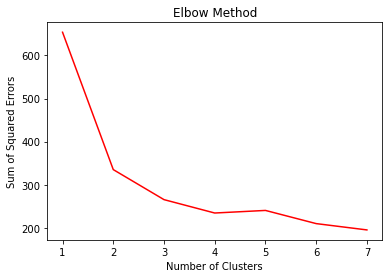

In [27]:
plt.plot(clusters, sum_of_errors, color = 'red')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

From the figure above we get to know that the **optimal number of clusters** for the given dataset is 3.  So we are gonna go with **k = 3** and do the kmeans clustering.

In [34]:
result = kmeans(data, k = 3)[1]
result

,sepallength,sepalwidth,petallength,petalwidth,labels
0,2.00,5.625,0.610169,0.375,0
1,1.50,3.750,0.610169,0.375,0
2,1.00,4.500,0.457627,0.375,0
3,0.75,4.125,0.762712,0.375,0
4,1.75,6.000,0.610169,0.375,0
...,...,...,...,...,...
145,6.00,3.750,6.406780,8.250,1
146,5.00,1.875,6.101695,6.750,1
147,5.50,3.750,6.406780,7.125,1
148,4.75,5.250,6.711864,8.250,1


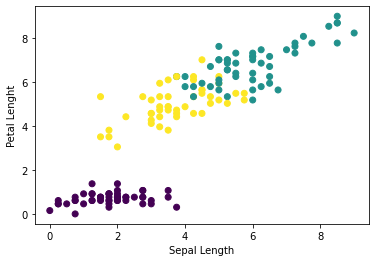

In [35]:
# visual representaion between sepal-length and petal-length
plt.scatter(result['sepallength'], result['petallength'], c = result['labels'])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Lenght")
plt.show()

The above figure shows clusters represented in different colours. It can be seen that some points pf different clusters are ovelapping with each other. This is beacause we are considering only two parameters/features for visual representaion. But while segmenting the data points into clusters we are considering 4 different parameters/features.  If we can somehow use all the featues for visual represenation then there will be no overlapping.